In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import math
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('../data/train_cleaned.csv')
weather = pd.read_csv('../data/weather_engr.csv')
spray = pd.read_csv('../data/spray_cleaned.csv', index_col='Unnamed: 0')

In [3]:
train.drop(columns=['Year','Month'], inplace=True)

In [4]:
train.head()

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1


In [5]:
train.shape

(10506, 10)

In [6]:
spray.head()

,Date,Latitude,Longitude,Year,Month,Day,Week
95,2011-07-09,41.981433,-87.787777,2011,7,9,27
96,2011-07-09,41.980998,-87.787778,2011,7,9,27
97,2011-07-09,41.980560,-87.787762,2011,7,9,27
98,2011-07-09,41.980198,-87.787758,2011,7,9,27
99,2011-07-09,41.979752,-87.787765,2011,7,9,27


In [7]:
# spray.drop(columns=['Year','Month'], inplace=True)

In [8]:
spray = spray[['Date', 'Latitude', 'Longitude','Week']]

In [9]:
spray.head()

,Date,Latitude,Longitude,Week
95,2011-07-09,41.981433,-87.787777,27
96,2011-07-09,41.980998,-87.787778,27
97,2011-07-09,41.980560,-87.787762,27
98,2011-07-09,41.980198,-87.787758,27
99,2011-07-09,41.979752,-87.787765,27


In [10]:
weather.rename(columns={'date':'Date'},inplace=True)

In [11]:
weather.head()

,Date,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,Station
0,2007-05-01,2007,5,18,0 days 14:01:00.000000000,83,50,67,14,51,56,0.0,29.10,29.82,1.7,27,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2007-05-02,2007,5,18,0 days 14:03:00.000000000,59,42,51,-3,42,47,0.0,29.38,30.09,13.0,4,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2007-05-03,2007,5,18,0 days 14:05:00.000000000,66,46,56,2,40,48,0.0,29.39,30.12,11.7,7,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2007-05-04,2007,5,18,0 days 14:08:00.000000000,66,49,58,4,41,50,0.0,29.31,30.05,10.4,8,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2007-05-05,2007,5,18,0 days 14:10:00.000000000,66,53,60,5,38,49,0.0,29.40,30.10,11.7,7,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

In [13]:
merge_tw = pd.merge(train,weather,on=['Station','Date'], how = 'left')

In [14]:
merge_tw.head()

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,4

In [15]:
merge_tw.shape

(10506, 74)

In [16]:
merge_tw.to_csv('../data/merged_train_weather.csv')

In [17]:
# has_been_sprayed(merge_tw,spray)

In [18]:
len(merge_tw.Trap.value_counts())

136

In [19]:
len(merge_tw.Latitude.value_counts())

138

In [20]:
traps = merge_tw.groupby(['Latitude','Longitude'])['Trap'].agg(['unique','count'])
traps

,,unique,count
Latitude,Longitude,,
41.644612,-87.604498,[T097],17
41.659112,-87.538693,[T221],112
41.662014,-87.724608,[T135],183
41.673408,-87.599862,[T115],542
41.678618,-87.559308,[T200],129
41.680946,-87.535198,[T212],152
41.682587,-87.707973,[T158],147
41.686398,-87.531635,[T215],45
41.688324,-87.676709,[T086],86


In [21]:
traps.shape

(138, 2)

In [22]:
traps['unique'].value_counts().head()

[T035]    2
[T009]    2
[T151]    1
[T028]    1
[T209]    1
Name: unique, dtype: int64

In [23]:
spray.shape

(14194, 4)

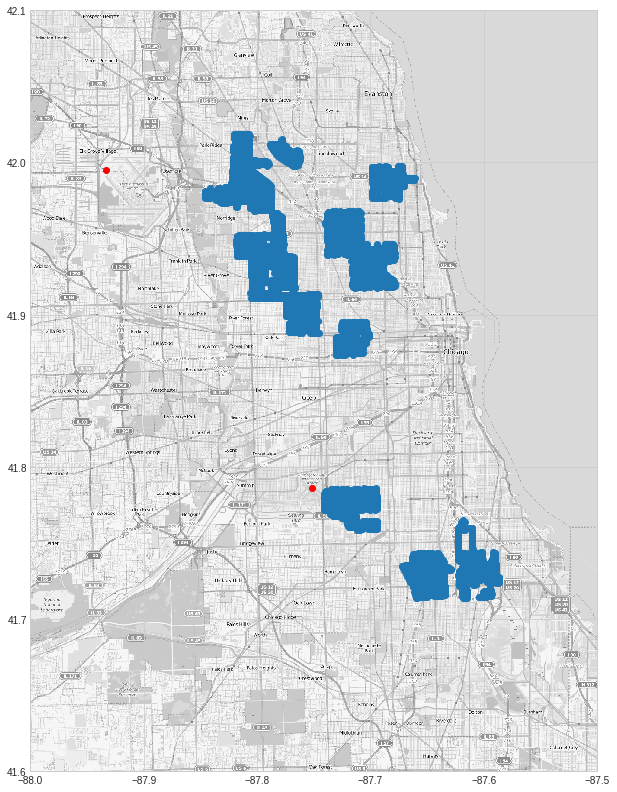

In [24]:
mapdata = np.loadtxt("../data/resources/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter([-87.933,-87.752],[41.995,41.786], marker = 'o', c='red')
plt.scatter(spray.Longitude, spray.Latitude ,marker = 'o')

In [25]:
spray.Date.unique()

array(['2011-07-09T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-05-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

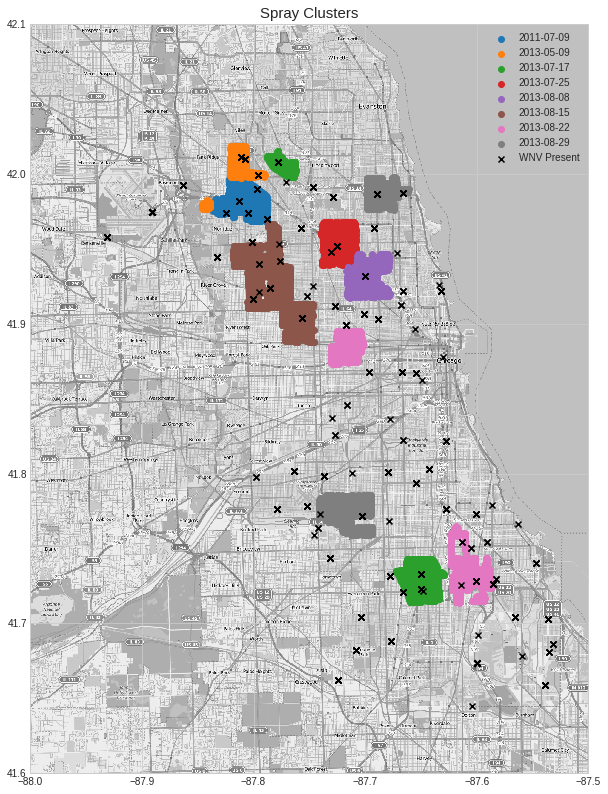

In [26]:
spray_df = spray
unique_dates = sorted(spray_df['Date'].unique())
mapdata = np.loadtxt("../data/resources/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(10,14))
plt.imshow(mapdata,
           cmap=plt.get_cmap('gray'),
           extent=lon_lat_box,
           aspect=aspect)
for i in range(len(unique_dates)):
    traps = spray_df.loc[spray_df['Date'] == unique_dates[i]]
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='o', label=unique_dates[i].astype(str)[:10])
    plt.legend()
    
plt.scatter(merge_tw[merge_tw['WnvPresent'] == 1]['Longitude'], 
            merge_tw[merge_tw['WnvPresent'] == 1]['Latitude'], 
            marker='x', label='WNV Present', color='black')

plt.legend()
plt.title('Spray Clusters', size=15);
plt.savefig('../images/Spray Clusters')

In [27]:
spray[spray['Date'] == '2013-08-16']

,Date,Latitude,Longitude,Week


In [28]:
# Code for getting clusters
unique_dates = sorted(spray_df['Date'].unique())
# del unique_dates[1]
# print(unique_dates)
# clusters = [1, 2, 3, 1, 1, 4, 2, 2, 2]
clusters = [1, 2, 2, 1, 1, 1, 2, 2]
sc = StandardScaler()
prev_len = 0
cluster_df = pd.DataFrame(columns=['Date', 'Latitude', 'Longitude', 'Cluster'])
for i in range(len(clusters)):
    X_subset = spray_df.loc[spray_df['Date'] == unique_dates[i],
                            ['Latitude', 'Longitude']]
    X_subset_sc = sc.fit_transform(X_subset)
    km = KMeans(n_clusters=clusters[i], random_state=42)
    km.fit(X_subset_sc)
    dates = spray_df.loc[spray_df['Date'] == unique_dates[i], 'Date']
    X_subset = pd.concat([dates, X_subset], axis=1)
    # Write algo to predict cluster on train and/or test data?
    X_subset['Cluster'] = km.labels_ + prev_len
    cluster_df = cluster_df.append(X_subset)
    prev_len = clusters[i] + prev_len

cluster_df.head()

,Date,Latitude,Longitude,Cluster
95,2011-07-09,41.981433,-87.787777,0
96,2011-07-09,41.980998,-87.787778,0
97,2011-07-09,41.980560,-87.787762,0
98,2011-07-09,41.980198,-87.787758,0
99,2011-07-09,41.979752,-87.787765,0


In [29]:
# #use BDSCAN to cluster spray data to use to create spray cluster feature
# X_spray = spray[['Latitude', 'Longitude']] #isolate lat long data
# spray_cluster_model = DBSCAN(eps=.01, min_samples=20).fit(X_spray) #run DBSCAN (parameters set after multiple iterations)
# X_spray['cluster'] = spray_cluster_model.labels_ #create cluster feature 
# #set dimensions of plot
# lon_lat_box_spray = (X_spray['Longitude'].min()-.1, X_spray['Longitude'].max()+.1, X_spray['Latitude'].min()-.1,X_spray['Latitude'].max()+.1)

# #create plot of spray clusters, for loop allows for legend to represent clusters 
# fig, ax = plt.subplots(figsize=(8,12))
# ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box_spray) 

# #iterate through each cluster value and plot points in the same figure (maintains lables)
# for i in X_spray['cluster'].unique():  
#     ax.scatter(X_spray[X_spray['cluster'] == i]['Longitude'], 
#                X_spray[X_spray['cluster'] == i]['Latitude'], 
#                label=i, marker='o')

# #overlay WNV presence
# plt.scatter(merge_tw[merge_tw['WnvPresent'] == 1]['Longitude'], 
#             merge_tw[merge_tw['WnvPresent'] == 1]['Latitude'], 
#             marker='x', label='WNV Present', color='r')
# plt.legend()
# plt.title('Spray Clusters', size=15);
# plt.savefig('../images/Spray Clusters')

In [30]:
import math
def midpoint_coordinates(coordinates_list):
    x = 0.0
    y = 0.0
    z = 0.0
    for coordinates in coordinates_list:
        latitude  = coordinates[0] * math.pi / 180
        longitude = coordinates[1] * math.pi / 180
        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)
    total = len(coordinates_list)
    x = x / total
    y = y / total
    z = z / total
    centralLongitude = math.atan2(y, x)
    centralSquareRoot = math.sqrt(x * x + y * y)
    centralLatitude = math.atan2(z, centralSquareRoot)
    return [centralLatitude * 180 / math.pi, centralLongitude * 180 / math.pi]

In [31]:
midpoint_dict = {}
for i in cluster_df.Cluster.unique():
    spray_coord = cluster_df.loc[cluster_df['Cluster'] == i, ['Latitude','Longitude']].values.astype(float).tolist()
    # print(midpoint_coordinates(spray_coord))
    midpoint = midpoint_coordinates(spray_coord)
    midpoint_dict[i] = midpoint

midpoint_dict

{0: [41.982274630447726, -87.80995250291352],
 1: [42.0071771693466, -87.81113483216464],
 2: [41.979433730243414, -87.84219679071076],
 4: [42.005216226917774, -87.7733036917262],
 3: [41.7288663859382, -87.64970910102812],
 5: [41.95453488101255, -87.72287906332113],
 6: [41.931466768022375, -87.69703534262085],
 7: [41.92760444284933, -87.78304041607744],
 8: [41.885313123032894, -87.71700869362206],
 9: [41.73290045992534, -87.607971308506],
 10: [41.774074581049945, -87.7165904814478],
 11: [41.98685193015921, -87.68357228747232]}

In [32]:
cluster_df['midpoint'] = cluster_df['Cluster'].map(midpoint_dict)
cluster_df[['midpt_Lat','midpt_Lon']] = pd.DataFrame(cluster_df.midpoint.values.tolist(), index = spray.index)
cluster_df.head()

,Date,Latitude,Longitude,Cluster,midpoint,midpt_Lat,midpt_Lon
95,2011-07-09,41.981433,-87.787777,0,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
96,2011-07-09,41.980998,-87.787778,0,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
97,2011-07-09,41.980560,-87.787762,0,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
98,2011-07-09,41.980198,-87.787758,0,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
99,2011-07-09,41.979752,-87.787765,0,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953


In [33]:
cluster_df.shape

(14194, 7)

In [34]:
cluster_to_merge = cluster_df[['Date','midpt_Lat','midpt_Lon','Cluster']]
# cluster_to_merge.drop_duplicates().sort_values(by = 'Cluster')
cluster_to_merge.shape

(14194, 4)

In [35]:
cluster_to_merge.drop_duplicates(subset='Cluster', inplace=True)

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
cluster_to_merge.sort_values(by='Cluster',ascending=True)

,Date,midpt_Lat,midpt_Lon,Cluster
95,2011-07-09,41.982275,-87.809953,0
13911,2013-05-09,41.986852,-87.683572,1
14606,2013-05-09,41.986852,-87.683572,2
2537,2013-07-17,42.007177,-87.811135,3
2209,2013-07-17,42.007177,-87.811135,4
4411,2013-07-25,41.728866,-87.649709,5
6018,2013-08-08,41.954535,-87.722879,6
7213,2013-08-15,41.931467,-87.697035,7
10022,2013-08-22,41.927604,-87.783040,8
10867,2013-08-22,41.927604,-87.783040,9


In [37]:
cluster_to_merge.shape

(12, 4)

In [38]:
cluster_to_merge.to_csv('../data/cluster_to_merge.csv')
traps.to_csv('../data/traps.csv')

In [39]:
# traps.reset_index(inplace=True)

In [40]:
indiv_traps = merge_tw.groupby(['Latitude','Longitude'])['Trap'].agg(['unique','count'])

In [41]:
indiv_traps.head()

,,unique,count
Latitude,Longitude,,
41.644612,-87.604498,[T097],17
41.659112,-87.538693,[T221],112
41.662014,-87.724608,[T135],183
41.673408,-87.599862,[T115],542
41.678618,-87.559308,[T200],129


In [42]:
indiv_traps.shape

(138, 2)

In [43]:
indiv_traps.reset_index(inplace=True)

In [44]:
indiv_traps.shape

(138, 4)

In [45]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers
    return c * r

In [46]:
indiv_traps['key'] = 1
cluster_to_merge['key'] = 1

df = indiv_traps.merge(cluster_to_merge,on='key')
del df['key']
df['distance'] = df.apply(lambda x: haversine(x['Longitude'],x['Latitude'],x['midpt_Lon'],x['midpt_Lat']),axis=1)
df.Cluster.value_counts()
df.head()

df = df.loc[df.groupby(['Longitude','Latitude'])["distance"].idxmin()]
# df.Cluster.value_counts()
# df.shape
df.head()

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Latitude,Longitude,unique,count,Date,midpt_Lat,midpt_Lon,Cluster,distance
1296,41.957799,-87.930995,[T903],140,2011-07-09,41.982275,-87.809953,0,10.381807
1428,41.974689,-87.890615,[T900],750,2011-07-09,41.982275,-87.809953,0,6.728237
1524,41.992478,-87.862995,[T009],80,2011-07-09,41.982275,-87.809953,0,4.533387
1208,41.944869,-87.832763,[T011],133,2013-08-22,41.927604,-87.783040,8,4.543842
1416,41.974089,-87.824812,[T015],35,2011-07-09,41.982275,-87.809953,0,1.530481


In [47]:
df_mapped = df[df['distance'] < 2.5]

In [48]:
df_mapped.Cluster.value_counts()

5     7
8     5
6     5
1     5
0     5
11    4
10    3
7     3
4     3
Name: Cluster, dtype: int64

In [49]:
merge_all = pd.merge(merge_tw,df_mapped[['Latitude','Longitude','midpt_Lat','midpt_Lon','Cluster','Date']], on = ['Latitude','Longitude'], how = 'left')

In [50]:
merge_all.head(2)

,Date_x,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Date_y
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT


In [51]:
merge_all.rename(columns = {'Date_x':'Test Date', 'Date_y': 'Spray Date'}, inplace=True)

In [52]:
merge_all.shape[0] - merge_all['Spray Date'].isnull().sum()

2074

In [53]:
merge_all.isnull().sum().tail()

AvgSpeed_wkly_lag21       0
midpt_Lat              8432
midpt_Lon              8432
Cluster                8432
Spray Date             8432
dtype: int64

In [54]:
merge_all.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.7142

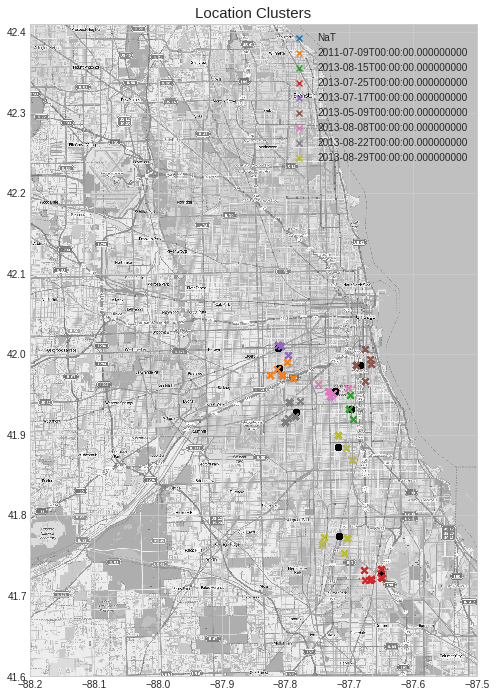

In [55]:
mapdata = np.loadtxt("../data/resources/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.41)

fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

ax.scatter(merge_all.midpt_Lon,merge_all.midpt_Lat, marker = 'o', c='black')
# plt.scatter(merge_all.Longitude, merge_all.Latitude ,marker = 'o')
for i in merge_all['Spray Date'].unique():
    a = str(i)[:10]
    ax.scatter(merge_all[merge_all['Spray Date'] == i]['Longitude'], 
               merge_all[merge_all['Spray Date'] == i]['Latitude'], 
               label=i, marker='x')
    
plt.legend()
plt.title('Location Clusters', size=15);
plt.savefig('../images/Location Clusters')

In [56]:
merge_all.to_csv('../data/merged_data.csv')

In [57]:
merge_all.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.7142

In [58]:
merge_all['Station'].value_counts()

2    7208
1    3298
Name: Station, dtype: int64